In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, curve_fit
import joblib as jl
import json
import glob
import matplotlib.cm as cm
import seaborn as sns


## Baseline (single task)

In [522]:
def max_overlap(x, T):
    return 1/T*x*(1-1/np.pi*np.arccos(x)) - np.sqrt(2/np.pi)*(1-x**2)

def overlap_change(x,T):
    try:
        doverlap_dt = 1/np.sqrt(2*np.pi)*(1-x**2)*(1-1/np.pi*np.arccos(x))**(T-1) - 1/(2*T)*x*(1-1/np.pi*np.arccos(x))**T
    except:
        print(x)
    return doverlap_dt*1/1000

def pos_exponential_func(x,a,b,c):
    return a * np.exp(b * x) + c
def neg_exponential_func(x,a,b,c):
    return  a*np.exp(-b * x) +c
def log_func(x,a,b):
    return a * np.log(-x) + b

In [528]:
task_steps={}
for T in (2,4,6,8,10):
    x_init = 0.9
    solution = fsolve(max_overlap, x_init, args=(T))
    x=1e-6
    for i in range(5000000):
        x += overlap_change(x, T)
        thres = solution - 0.01
        if x>=(thres):
            print(f'{T}: {thres} requires {i} updates')
            task_steps[T]=i
            break

adaptation4 = {2:10000, 4:12000, 6:20000, 8:24000, 10: 34000}


2: [0.77347155] requires 7826 updates
4: [0.86696458] requires 16976 updates
6: [0.90356941] requires 38313 updates
8: [0.92322088] requires 97364 updates
10: [0.93551863] requires 276708 updates


In [567]:

adaptationK = {2:24000, 4:20000, 6: 20000, 8: 18000}

Text(0, 0.5, 'Total training time')

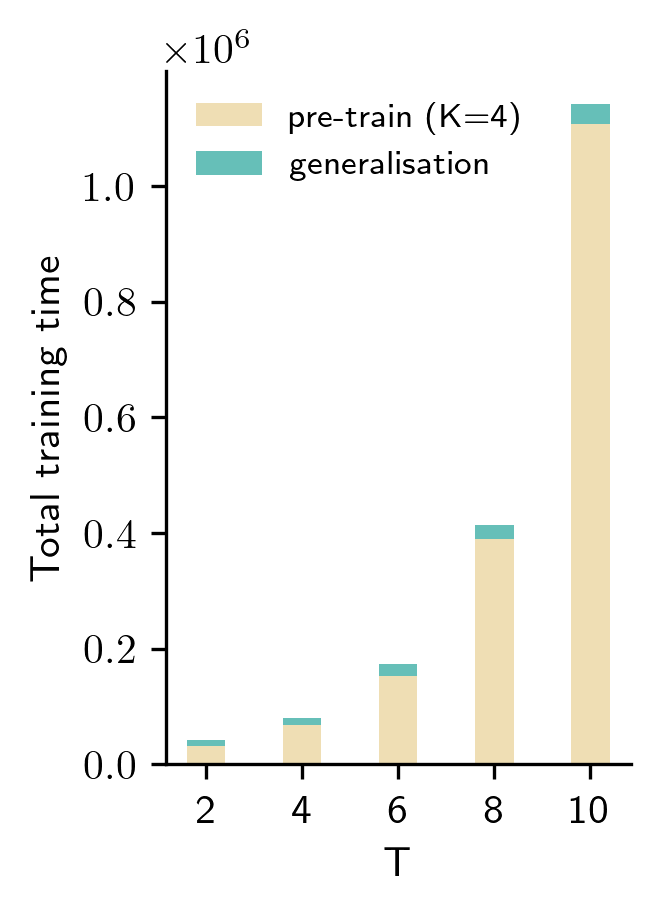

In [581]:
plt.rcParams['text.usetex'] = True
fig, ax1 = plt.subplots(1,1,figsize=(2,3), dpi=300)
for t in [2,4,6,8,10]:
    pretrain=ax1.bar(t, task_steps[t]*4, color= '#E1BE6A', alpha =0.5, label = 'pre-train (K=4)')
    adaptation=ax1.bar(t, height = adaptation4[t], bottom = task_steps[t]*4, 
                       color = '#40B0A6', alpha = 0.8, label = 'generalisation')
handles = [pretrain, adaptation]
plt.legend(handles = handles, frameon= False, loc = 'upper left', fontsize=8)
ax1.set_xticks([2,4,6,8,10])
ax1.set_xticklabels([2,4,6,8,10])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('T')
ax1.set_ylabel('Total training time')

Text(0, 0.5, 'Total training time')

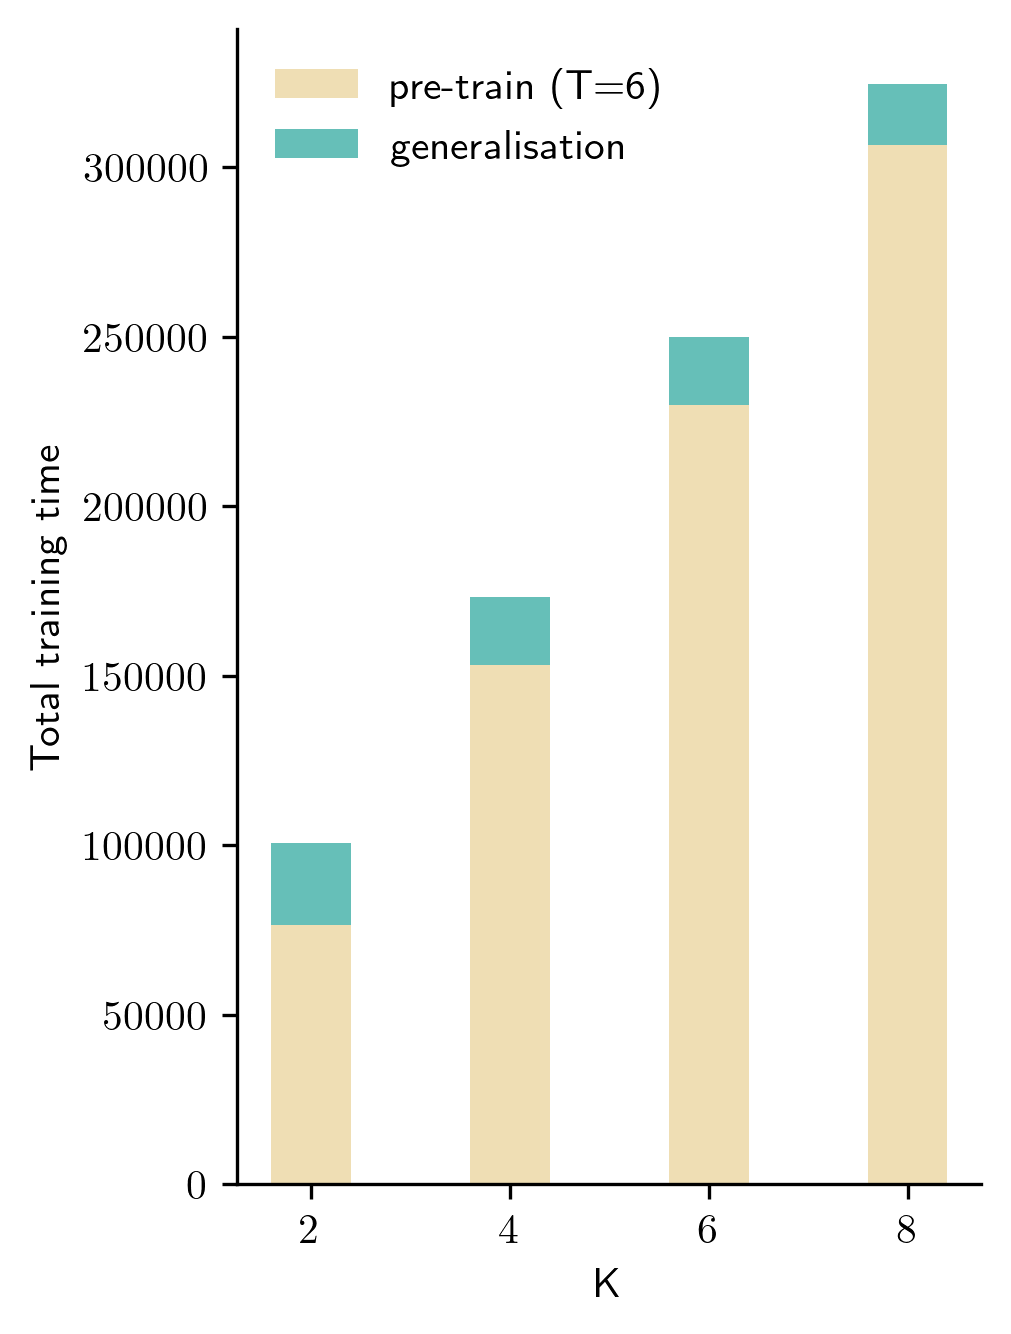

In [569]:
fig, ax1 = plt.subplots(1,1,figsize=(3.2,5), dpi=300)
for t in [6]:
    for k in adaptationK.keys():
        pretrain=ax1.bar(k, task_steps[t]*k, color= '#E1BE6A', alpha =0.5, label = 'pre-train (T=6)')
        adaptation=ax1.bar(k, height = adaptationK[k], bottom = task_steps[t]*k, 
                           color = '#40B0A6', alpha = 0.8, label = 'generalisation')
handles = [pretrain, adaptation]
plt.legend(handles = handles, frameon= False, loc = 'upper left')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('K')
ax1.set_ylabel('Total training time')

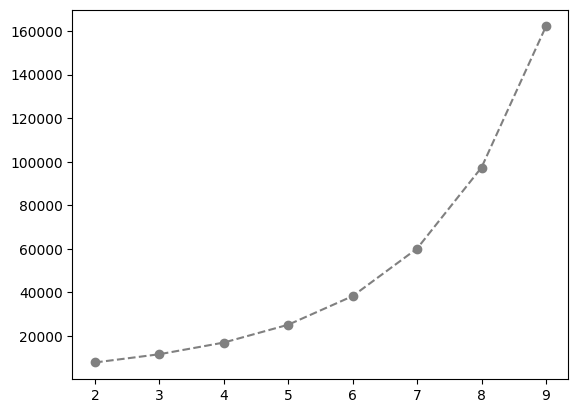

In [521]:
"""
popt, pcov = curve_fit(neg_exponential_func,
                         xdata = list(steps.keys()),
                         ydata = np.array(list(steps.values()))[:,0])
a,b,c= popt

print(f'{a:.3f}*exp({-b:.3f}*x + {c:.3f})')
"""
#plt.plot(np.linspace(1, 10, 50), neg_exponential_func(np.linspace(1, 10, 50),*popt), 
#                 c = 'gray', ls = '--')
plt.plot(list(steps.keys()), np.array(list(steps.values()))[:,0],'o--', c='gray')

In [367]:
WT=gram_schmidt(N,4)[1]
for i in range(4):
    for j in range(4):
        print( i,j, np.dot(WT[i],WT[j])/N)
        w=control_VS(WT[i], np.pi/2)*np.sqrt(N)
        print(np.dot(w, WT[i])/N)

0 0 1.0892732106173522
7.193537148160331e-17
0 1 1.40388562722308e-17
6.385223664263362e-17
0 2 1.3349686584395816e-17
5.653668443680518e-17
0 3 1.814059670463802e-17
6.550610408772556e-17
1 0 1.40388562722308e-17
3.6244070271758784e-17
1 1 1.0184951691230506
6.669168016104905e-17
1 2 1.60910548335882e-18
6.276166253349967e-17
1 3 2.3098034082609006e-17
5.794340205202671e-17
2 0 1.3349686584395816e-17
6.34210009392213e-17
2 1 1.60910548335882e-18
6.236265228245577e-17
2 2 0.9358612913072853
4.005896199264767e-17
2 3 1.3851188075511402e-17
4.174079964991211e-17
3 0 1.814059670463802e-17
4.575687383857743e-17
3 1 2.3098034082609006e-17
4.842856519861126e-17
3 2 1.3851188075511402e-17
3.919205326600371e-17
3 3 1.0284203345928478
7.528760297246264e-17


In [373]:
VT = np.ones(K)
VT = VT/np.linalg.norm(VT)
_,WT = gram_schmidt(N, 1)
WS = np.array(control_VS(WT[0], np.pi/2) * np.sqrt(N), dtype = np.float64)

In [376]:
np.dot(WS,WT[0])/np.sqrt(N)

1.5587121421164237e-15

In [377]:
for i,w in enumerate(WT):
    print(w.shape)

(1000,)


## Composite Task

In [355]:
K=2
N=1000
VT = np.ones(K)
VT = VT/np.linalg.norm(VT)

def overlap_tilde(V, R):
    return np.sum(V*R*VT)
def R_dt(V, R, T):
    dR = 1/np.sqrt(2*np.pi)*(V*V*R + V*VT)*((1-1/np.pi*np.arccos(overlap_tilde(V,R)))**(T-1))
    return dR/N
def V_dt(V, R, T):

    dV = 1/np.sqrt(2*np.pi)*(V + VT*R)*((1-1/np.pi*np.arccos(overlap_tilde(V,R)))**(T-1))
    return dV/N

def Q_dt(V, R, T):
    dQ = 2/ np.sqrt(2*np.pi)*(1-1/np.pi*np.arccos(overlap_tilde(V,R)))**(T-1) * V * (V + VT * R) + \
    (1-1/np.pi*np.arccos(overlap_tilde(V,R)))**(T) / T * (V *V)
    
    return dQ/N

def gram_schmidt(N, K):
    """
    Given the dimension space dimension N, generate K random vectors and its orthogonal spans
    """

    def proj(u, v):
        """
        Return projection of v to u
        """
        return np.dot(v, u) / np.dot(u, u) * u

    V = np.random.normal(loc=0., scale=1., size=(K, N))
    U = np.zeros_like(V)

    ## Initialise u1 to v1
    U[0] = V[0]

    ## Gram-schomidt process
    for k in range(1, K):
        projection_terms = [proj(U[i], V[k]) for i in range(k)]
        U[k] = V[k] - np.sum(projection_terms, axis=0)

    return V, U

def control_VS(VT, angle):
    dim = len(VT)
    VT_norm = VT / np.linalg.norm(VT)
    a = np.random.normal(loc=0., scale=1, size=(dim))
    b = np.random.normal(loc=0., scale=1, size=(dim))
    h = (b - a) - np.dot((b - a), VT_norm) * VT_norm
    v = np.cos(angle) * VT_norm + np.sin(angle) * h / np.linalg.norm(h)

    return v


In [418]:
steps={}
for K in (2,3,4,5,6,7,8):
    _, WT = gram_schmidt(N, K)
    WS = WT.copy()
    VT = np.ones(K)
    VT = VT/np.linalg.norm(VT)
    for i, w in enumerate(WS):
        w_rot = control_VS(w, np.pi / 2) * np.sqrt(N)
        WS[i] = w_rot
    for T in (2,3,4,5,6,7,8,9,10,11,12):
        x_init = 0.9
        solution = fsolve(max_overlap, x_init, args=(T))
        V=control_VS(VT, 0.79)
        R= np.sum(WT*WS, axis=-1)/N
        Q= np.ones(K)
        for i in range(5000000):
            temp_R = R
            temp_V = V
            temp_Q = Q
            Q += Q_dt(temp_V, temp_R, T)
            R += R_dt(temp_V, temp_R,T)
            V += V_dt(temp_V, temp_R, T)
            V /= np.linalg.norm(V)
            R /=np.sqrt(np.abs(Q))
            Q /=Q
            x = overlap_tilde(V,R)
            if x>=(0.1):
                print(f'{(T,K)}: {0.1} requires {i} updates')
                steps[(T,K)]=i
                break

(2, 2): 0.1 requires 1012 updates
(3, 2): 0.1 requires 1940 updates
(4, 2): 0.1 requires 3741 updates
(5, 2): 0.1 requires 7235 updates
(6, 2): 0.1 requires 14013 updates
(7, 2): 0.1 requires 27165 updates
(8, 2): 0.1 requires 52701 updates
(9, 2): 0.1 requires 102302 updates
(10, 2): 0.1 requires 198686 updates
(11, 2): 0.1 requires 386051 updates
(12, 2): 0.1 requires 750418 updates
(2, 3): 0.1 requires 1512 updates
(3, 3): 0.1 requires 2944 updates
(4, 3): 0.1 requires 5630 updates
(5, 3): 0.1 requires 10811 updates
(6, 3): 0.1 requires 21048 updates
(7, 3): 0.1 requires 40996 updates
(8, 3): 0.1 requires 79070 updates
(9, 3): 0.1 requires 153214 updates
(10, 3): 0.1 requires 299451 updates
(11, 3): 0.1 requires 577569 updates
(12, 3): 0.1 requires 1122575 updates
(2, 4): 0.1 requires 2034 updates
(3, 4): 0.1 requires 3842 updates
(4, 4): 0.1 requires 7444 updates
(5, 4): 0.1 requires 14633 updates
(6, 4): 0.1 requires 28007 updates
(7, 4): 0.1 requires 54742 updates
(8, 4): 0.1 req

In [421]:
steps_indiv={}
for K in (2,3,4,5,6,7,8):
    _, WT = gram_schmidt(N, K)
    WS = WT.copy()
    VT = np.ones(K)
    VT = VT/np.linalg.norm(VT)
    for i, w in enumerate(WS):
        w_rot = control_VS(w, np.pi / 2) * np.sqrt(N)
        WS[i] = w_rot
    for T in (2,3,4,5,6,7,8,9,10,11,12):
        x_init = 0.9
        solution = fsolve(max_overlap, x_init, args=(T))
        V=control_VS(VT, 0.79)
        R= np.sum(WT*WS, axis=-1)/N
        Q= np.ones(K)
        for i in range(5000000):
            temp_R = R
            temp_V = V
            temp_Q = Q
            Q += Q_dt(temp_V, temp_R, T)
            R += R_dt(temp_V, temp_R,T)
            V += V_dt(temp_V, temp_R, T)
            V /= np.linalg.norm(V)
            R /=np.sqrt(np.abs(Q))
            Q /=Q
            #x = overlap_tilde(V,R)
            if np.any(abs(R)>=0.1):
                print(f'{(T,K)}: {0.1} requires {i} updates')
                steps_indiv[(T,K)]=i
                break

(2, 2): 0.1 requires 712 updates
(3, 2): 0.1 requires 1382 updates
(4, 2): 0.1 requires 2694 updates
(5, 2): 0.1 requires 5260 updates
(6, 2): 0.1 requires 10281 updates
(7, 2): 0.1 requires 20106 updates
(8, 2): 0.1 requires 39338 updates
(9, 2): 0.1 requires 76990 updates
(10, 2): 0.1 requires 150724 updates
(11, 2): 0.1 requires 295151 updates
(12, 2): 0.1 requires 578104 updates
(2, 3): 0.1 requires 1002 updates
(3, 3): 0.1 requires 1856 updates
(4, 3): 0.1 requires 4379 updates
(5, 3): 0.1 requires 6776 updates
(6, 3): 0.1 requires 14477 updates
(7, 3): 0.1 requires 31408 updates
(8, 3): 0.1 requires 50768 updates
(9, 3): 0.1 requires 99562 updates
(10, 3): 0.1 requires 231991 updates
(11, 3): 0.1 requires 388850 updates
(12, 3): 0.1 requires 894222 updates
(2, 4): 0.1 requires 1593 updates
(3, 4): 0.1 requires 2278 updates
(4, 4): 0.1 requires 4535 updates
(5, 4): 0.1 requires 8764 updates
(6, 4): 0.1 requires 22677 updates
(7, 4): 0.1 requires 31659 updates
(8, 4): 0.1 requires 

In [422]:
steps_indiv

{(2, 2): 712,
 (3, 2): 1382,
 (4, 2): 2694,
 (5, 2): 5260,
 (6, 2): 10281,
 (7, 2): 20106,
 (8, 2): 39338,
 (9, 2): 76990,
 (10, 2): 150724,
 (11, 2): 295151,
 (12, 2): 578104,
 (2, 3): 1002,
 (3, 3): 1856,
 (4, 3): 4379,
 (5, 3): 6776,
 (6, 3): 14477,
 (7, 3): 31408,
 (8, 3): 50768,
 (9, 3): 99562,
 (10, 3): 231991,
 (11, 3): 388850,
 (12, 3): 894222,
 (2, 4): 1593,
 (3, 4): 2278,
 (4, 4): 4535,
 (5, 4): 8764,
 (6, 4): 22677,
 (7, 4): 31659,
 (8, 4): 89412,
 (9, 4): 153381,
 (10, 4): 299082,
 (11, 4): 529482,
 (12, 4): 970144,
 (2, 5): 1815,
 (3, 5): 2961,
 (4, 5): 5958,
 (5, 5): 11232,
 (6, 5): 22972,
 (7, 5): 44597,
 (8, 5): 76880,
 (9, 5): 174385,
 (10, 5): 309383,
 (11, 5): 612712,
 (12, 5): 1639789,
 (2, 6): 1658,
 (3, 6): 2690,
 (4, 6): 7487,
 (5, 6): 12899,
 (6, 6): 24924,
 (7, 6): 45082,
 (8, 6): 121765,
 (9, 6): 201641,
 (10, 6): 497155,
 (11, 6): 765974,
 (12, 6): 1250733,
 (2, 7): 1763,
 (3, 7): 3784,
 (4, 7): 8568,
 (5, 7): 12451,
 (6, 7): 29068,
 (7, 7): 57750,
 (8, 7): 1

In [412]:
T=6
steps={}

for K in (2,3,4,5,6,7,8):
    _, WT = gram_schmidt(N, K)
    WS = WT.copy()
    VT = np.ones(K)
    VT = VT/np.linalg.norm(VT)
    for i, w in enumerate(WS):
        w_rot = control_VS(w, np.pi / 2) * np.sqrt(N)
        WS[i] = w_rot
    x_init = 0.9
    solution = fsolve(max_overlap, x_init, args=(T))
    V=control_VS(VT, 0.79)
    R= np.sum(WT*WS, axis=-1)/N
    Q= np.ones(K)
    for i in range(5000000):
        temp_R = R
        temp_V = V
        temp_Q = Q
        Q += Q_dt(temp_V, temp_R, T)
        R += R_dt(temp_V, temp_R,T)
        V += V_dt(temp_V, temp_R, T)
        V /= np.linalg.norm(V)
        R /=np.sqrt(np.abs(Q))
        Q /=Q
        x = overlap_tilde(V,R)
        if x>=(0.1):
            print(f'{K}: {0.1} requires {i} updates')
            steps[K]=i
            break

2: 0.1 requires 14013 updates
3: 0.1 requires 21137 updates
4: 0.1 requires 28237 updates
5: 0.1 requires 34922 updates
6: 0.1 requires 41990 updates
7: 0.1 requires 48961 updates
8: 0.1 requires 56073 updates


In [413]:
steps

{2: 14013, 3: 21137, 4: 28237, 5: 34922, 6: 41990, 7: 48961, 8: 56073}

## Survey!

In [492]:
# 0.52 0.79 1.05 1.57 
w_angle = 1.57
v_angle = 0.79
def load_log(p):
    log =jl.load(p)
    args = json.load(open('/'.join(p.split('/')[:-1]) + '/args.json', 'r'))    
    return log, args

def get_training_time(p):
    log, args = load_log(p)
    num_tasks = args['num_tasks']
    seq_length = args['seq_length']
    pretrain_num_iter = 0
    composite_num_iter = 0
    num_iter = 0
    overlap_tilde = None
    if args['max_iters'][0] == 0: ##Baseline case
        if log['composite'] is not None and args['v_angle']==v_angle and args['w_angle']==w_angle:
            threshold = log['composite']['threshold']
            num_iter = log['composite']['iter']
            overlap_tilde = log['composite']['overlap_tilde']

    else:## Pretraining case
        if log['pretraining'] is not None and args['v_angle']==v_angle and args['w_angle']==w_angle:
            pretrain_threshold = log['pretraining']['threshold']
            pretrain_num_iter = log['pretraining']['iter']
            overlap = log['pretraining']['overlap_task']
        if log['composite'] is not None and args['v_angle']==v_angle and args['w_angle']==w_angle:
            composite_threshold = log['composite']['threshold']
            composite_num_iter = log['composite']['iter']
            overlap_tilde = log['composite']['overlap_tilde']
        
        num_iter = num_tasks * pretrain_num_iter + composite_num_iter
        
    
    return num_tasks, seq_length, num_iter, overlap_tilde

## Only look at ODES

In [493]:
baseline_training_time = {}
for baseline_p in glob.glob('hrl_ode_logs/191023_baseline_training_time_vwangle/*/ode*'):
    num_tasks, seq_length, num_iter, overlap_tilde=get_training_time(baseline_p)
    if num_iter !=0:
        if (num_tasks, seq_length) not in baseline_training_time.keys():
            baseline_training_time[(num_tasks, seq_length)] = np.array([[num_iter, overlap_tilde]])
        else:
            baseline_training_time[(num_tasks, seq_length)]=np.vstack([baseline_training_time[(num_tasks, seq_length)], 
                                                                        [num_iter, overlap_tilde]])

In [494]:
curriculum_training_time = {}
for curriculum_p in glob.glob('hrl_ode_logs/191023_curriculum_training_time_vwangle/*/ode*'):
    num_tasks, seq_length, num_iter, overlap_tilde=get_training_time(curriculum_p)
    if num_iter !=0:
        if (num_tasks, seq_length) not in curriculum_training_time.keys():
            curriculum_training_time[(num_tasks, seq_length)] = np.array([[num_iter, overlap_tilde]])
        else:
            curriculum_training_time[(num_tasks, seq_length)]=np.vstack([curriculum_training_time[(num_tasks, seq_length)],
                                                                        [num_iter, overlap_tilde]])

In [434]:
time_list

[[2, array([153904., 153904., 153904., 153904., 153904.])],
 [3, array([207474., 204599., 207259., 203416., 204939.])],
 [4, array([252308., 256353., 255965., 253501., 252799.])],
 [5, array([300688., 301873., 299371., 300615., 300155.])],
 [6, array([346773., 348661., 345587., 346060., 347260.])],
 [7, array([394954., 391290., 392479., 392316., 392185.])],
 [8, array([436696., 436382., 437409., 437222., 436080.])]]

In [431]:
num_tasks_list=np.unique(np.array(list(baseline_training_time.keys()))[:,0])
seq_length_list = np.unique(np.array(list(baseline_training_time.keys()))[:,1])

Text(0.5, 1.0, 'Baseline training time - K')

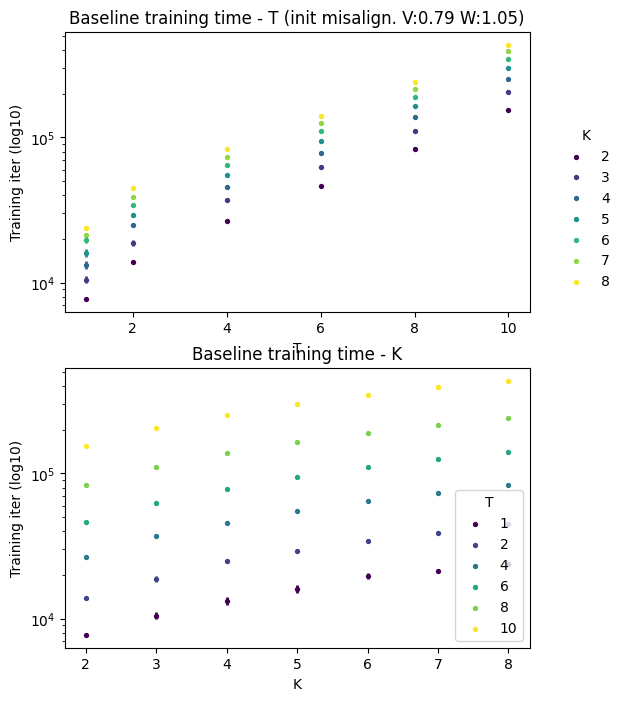

In [480]:
fig = plt.figure(figsize=(6,8))
ax1 = plt.subplot(211)
cmap1=cm.viridis(range(0, len(num_tasks_list))/np.mean(range(0, len(num_tasks_list)))/2)
handles =[]
for i, num_task in enumerate(num_tasks_list):
    time_list=[[k[1],np.mean(v[:,0]), np.std(v[:,0])] for k, v in baseline_training_time.items() if k[0] == num_task]
    for seq_score in time_list:
        seq_length=seq_score[0]
        mean = seq_score[1]
        std= seq_score[2] + 1e-1
        seq=ax1.errorbar([seq_length], mean, yerr= std, color = cmap1[i],elinewidth =2)
        seq=ax1.scatter([seq_length], mean,  color = cmap1[i],s = 8,label = num_task)
    handles.append(seq)
    ax1.legend(handles = handles, title = 'K', frameon = False, bbox_to_anchor=(1.2, 0.7),)
    ax1.set_yscale('log')
ax1.set_xlabel('T')
ax1.set_ylabel('Training iter (log10)')
ax1.set_title(f'Baseline training time - T (init misalign. V:{v_angle} W:{w_angle})')
ax2 = plt.subplot(212)
cmap2=cm.viridis(range(0, len(seq_length_list))/np.mean(range(0, len(seq_length_list)))/2)
handles =[]
for i, seq_length in enumerate(seq_length_list):
    time_list=[[k[0],np.mean(v[:,0]), np.std(v[:,0])] for k, v in baseline_training_time.items() if k[1] == seq_length]
    for task_score in time_list:
        num_task=task_score[0]
        mean = task_score[1]
        std = task_score[2]
        task=ax2.errorbar([num_task], mean, yerr= std, color = cmap2[i],elinewidth =2)
        task=ax2.scatter([num_task], mean, color = cmap2[i], s=8, label = seq_length)
    handles.append(task)
    ax2.legend(handles = handles, title = 'T')
    ax2.set_yscale('log')
ax2.set_xlabel('K')
ax2.set_ylabel('Training iter (log10)')
ax2.set_title('Baseline training time - K')

Text(0.5, 1.0, 'Baseline training time - K')

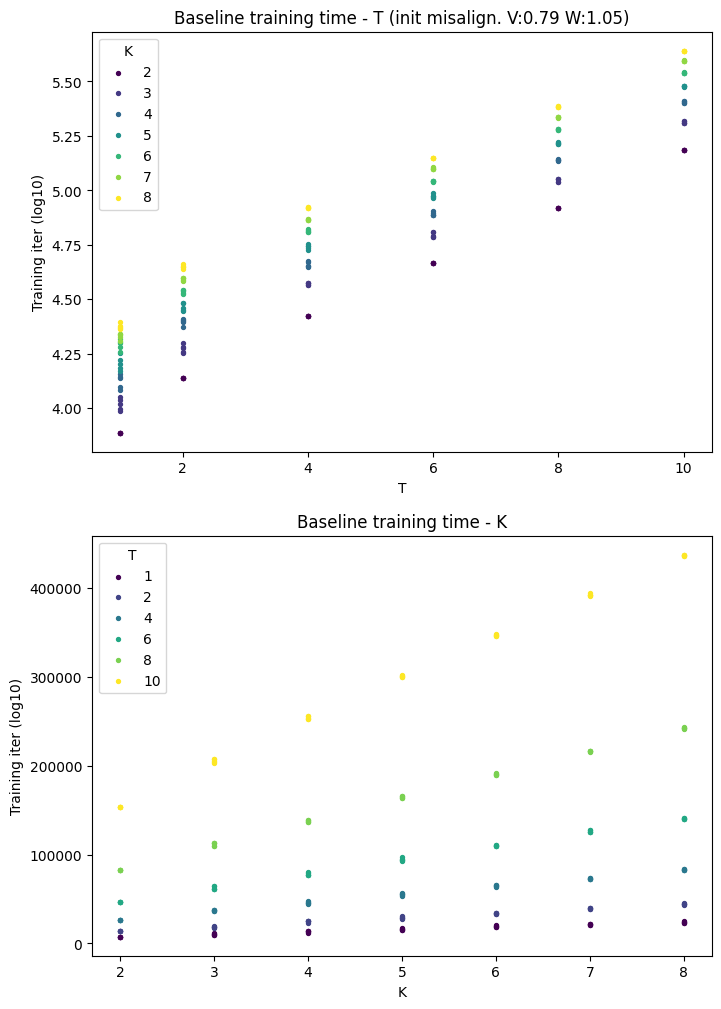

In [439]:
fig = plt.figure(figsize=(8,12))
ax1 = plt.subplot(211)
cmap1=cm.viridis(range(0, len(num_tasks_list))/np.mean(range(0, len(num_tasks_list)))/2)
handles =[]
for i, num_task in enumerate(num_tasks_list):
    time_list=[[k[1],v[:,0]] for k, v in baseline_training_time.items() if k[0] == num_task]
    for seq_score in time_list:
        seq_length=seq_score[0]
        iter_nums = seq_score[1]
        seq=ax1.scatter([seq_length]*len(iter_nums), np.log10(iter_nums), color = cmap1[i], s=8, label = num_task)
    handles.append(seq)
    ax1.legend(handles = handles, title = 'K')
ax1.set_xlabel('T')
ax1.set_ylabel('Training iter (log10)')
ax1.set_title(f'Baseline training time - T (init misalign. V:{v_angle} W:{w_angle})')
ax2 = plt.subplot(212)
cmap2=cm.viridis(range(0, len(seq_length_list))/np.mean(range(0, len(seq_length_list)))/2)
handles =[]
for i, seq_length in enumerate(seq_length_list):
    time_list=[[k[0],v[:,0]] for k, v in baseline_training_time.items() if k[1] == seq_length]
    for task_score in time_list:
        num_task=task_score[0]
        iter_nums = task_score[1]
        task=ax2.scatter([num_task]*len(iter_nums), iter_nums, color = cmap2[i], s=8, label = seq_length)
    handles.append(task)
    ax2.legend(handles = handles, title = 'T')
ax2.set_xlabel('K')
ax2.set_ylabel('Training iter (log10)')
ax2.set_title('Baseline training time - K')

Text(0.5, 1.0, 'Curriculum training time - K')

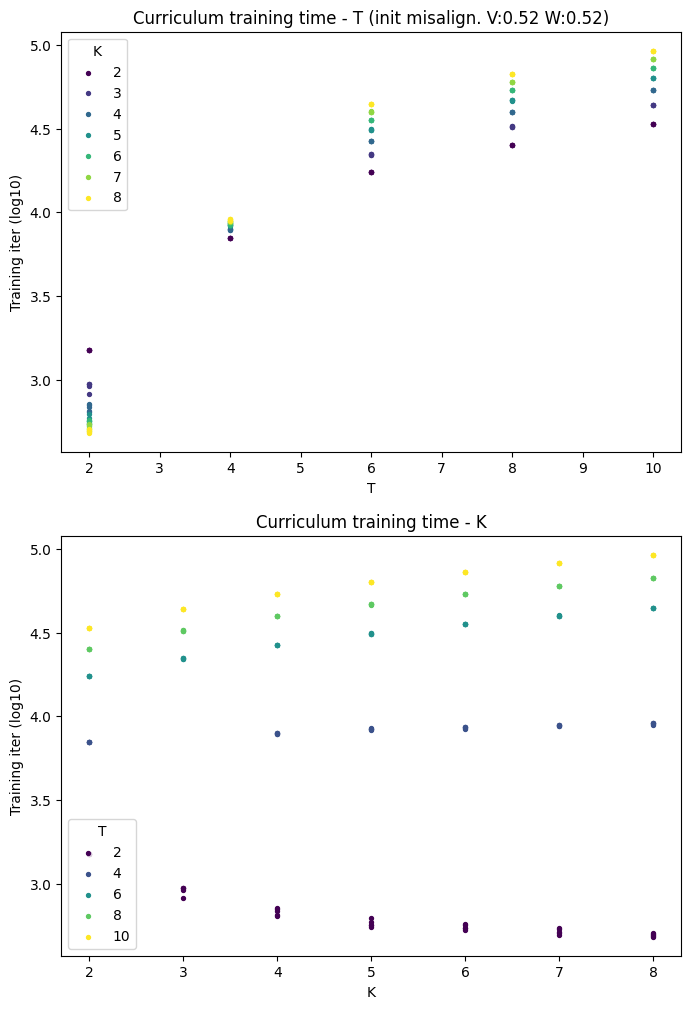

In [172]:
fig = plt.figure(figsize=(8,12))
ax1 = plt.subplot(211)
cmap1=cm.viridis(range(0, len(num_tasks_list))/np.mean(range(0, len(num_tasks_list)))/2)
handles =[]
for i, num_task in enumerate(num_tasks_list):
    time_list=[[k[1],v[:,0]] for k, v in curriculum_training_time.items() if k[0] == num_task]
    for seq_score in time_list:
        seq_length=seq_score[0]
        iter_nums = seq_score[1]
        
        seq=ax1.scatter([seq_length]*len(iter_nums), np.log10(iter_nums), color = cmap1[i], s=8, label = num_task)
    handles.append(seq)
    ax1.legend(handles = handles, title = 'K')
ax1.set_xlabel('T')
ax1.set_ylabel('Training iter (log10)')
ax1.set_title(f'Curriculum training time - T (init misalign. V:{v_angle} W:{w_angle})')
ax2 = plt.subplot(212)
cmap2=cm.viridis(range(0, len(seq_length_list))/np.mean(range(0, len(seq_length_list)))/2)
handles =[]
for i, seq_length in enumerate(seq_length_list):
    time_list=[[k[0],v[:,0]] for k, v in curriculum_training_time.items() if k[1] == seq_length]
    for task_score in time_list:
        num_task=task_score[0]
        iter_nums = task_score[1]
        task=ax2.scatter([num_task]*len(iter_nums), np.log10(iter_nums), color = cmap2[i], s=8, label = seq_length)
    handles.append(task)
    ax2.legend(handles = handles, title = 'T')
ax2.set_xlabel('K')
ax2.set_ylabel('Training iter (log10)')
ax2.set_title('Curriculum training time - K')

<Figure size 1400x600 with 0 Axes>

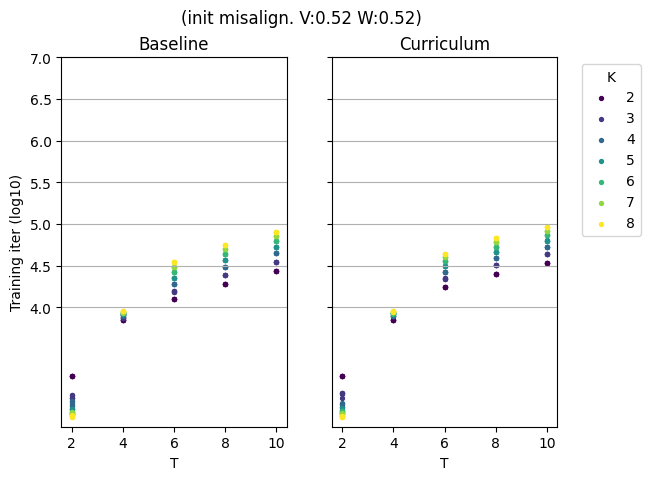

In [173]:
fig = plt.figure(figsize=(14,6))
_, axs = plt.subplots(1,2, sharey=True )
plt.suptitle(f'(init misalign. V:{v_angle} W:{w_angle})')
ax1=axs[0]
ax2=axs[1]
cmap=cm.viridis(range(0, len(num_tasks_list))/np.mean(range(0, len(num_tasks_list)))/2)
handles =[]
for i, num_task in enumerate(num_tasks_list):
    time_list=[[k[1],v[:,0]] for k, v in baseline_training_time.items() if k[0] == num_task]
    for seq_score in time_list:
        seq_length=seq_score[0]
        iter_nums = seq_score[1]
        seq=ax1.scatter([seq_length]*len(iter_nums), np.log10(iter_nums), color = cmap[i], s=8, label = num_task)



for i, num_task in enumerate(num_tasks_list):
    time_list=[[k[1],v[:,0]] for k, v in curriculum_training_time.items() if k[0] == num_task]
    for seq_score in time_list:
        seq_length=seq_score[0]
        iter_nums = seq_score[1]
        seq=ax2.scatter([seq_length]*len(iter_nums), np.log10(iter_nums), color = cmap[i], s=8, label = num_task)
    handles.append(seq)
    ax2.legend(handles = handles, title = 'K', bbox_to_anchor=(0.9, 0.5, 0.5, 0.5))
ax1.set_xlabel('T')
ax1.set_ylabel('Training iter (log10)')
ax1.set_title('Baseline')

ax2.set_xlabel('T')
ax2.set_title('Curriculum')
ax1.set_yticks(np.linspace(4,7,7), labels =None, minor=False )
ax1.set_yticks(np.linspace(4,7,7), labels =[], minor=True )

ax1.set_xticks(seq_length_list, seq_length_list)
ax2.set_xticks(seq_length_list, seq_length_list)

ax1.grid(True,axis='y',which='both')
ax2.grid(True,axis='y',which='both')


<Figure size 1400x600 with 0 Axes>

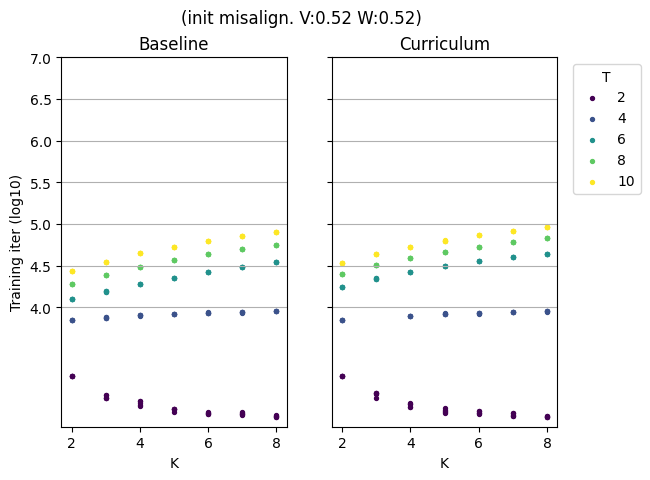

In [174]:
fig = plt.figure(figsize=(14,6))
_, axs = plt.subplots(1,2, sharey=True )
plt.suptitle(f'(init misalign. V:{v_angle} W:{w_angle})')
ax1=axs[0]
ax2=axs[1]
cmap=cm.viridis(range(0, len(seq_length_list))/np.mean(range(0, len(seq_length_list)))/2)
handles =[]
for i, seq_length in enumerate(seq_length_list):
    time_list=[[k[0],v[:,0]] for k, v in baseline_training_time.items() if k[1] == seq_length]
    for task_score in time_list:
        num_task=task_score[0]
        iter_nums = task_score[1]
        task=ax1.scatter([num_task]*len(iter_nums), np.log10(iter_nums), color = cmap[i], s=8, label = seq_length)
for i, seq_length in enumerate(seq_length_list):
    time_list=[[k[0],v[:,0]] for k, v in curriculum_training_time.items() if k[1] == seq_length]
    for task_score in time_list:
        num_task=task_score[0]
        iter_nums = task_score[1]
        task=ax2.scatter([num_task]*len(iter_nums), np.log10(iter_nums), color = cmap[i], s=8, label = seq_length)
    handles.append(task)
    ax2.legend(handles = handles, title = 'T', bbox_to_anchor=(0.9, 0.5, 0.5, 0.5) )
ax1.set_xlabel('K')
ax1.set_ylabel('Training iter (log10)')
ax1.set_title('Baseline')
ax1.grid(True,axis='y')
labels = np.zeros(21)
ax1.set_yticks(np.linspace(4,7,7), labels =None, minor=False )
ax1.set_yticks(np.linspace(4,7,7), labels =[], minor=True )
ax1.grid(True,axis='y',which='both')

ax2.set_xlabel('K')
ax2.set_title('Curriculum')
ax2.grid(True,axis='y',which='both')


## Difference?

In [481]:
difference_percent={k: -(np.mean(curriculum_training_time[k][:,0])-np.mean(v[:,0]))/np.mean(baseline_training_time[k][:,0]) for k,v in baseline_training_time.items() if k in curriculum_training_time.keys()}
difference_percent_heatmap = np.ones((len(num_tasks_list), len(seq_length_list)))

In [482]:
num_tasks_list=np.unique(np.array(list(difference_percent.keys()))[:,0])
seq_length_list = np.unique(np.array(list(difference_percent.keys()))[:,1])

In [483]:
for i,task in enumerate(num_tasks_list):
    for j, seq in enumerate(seq_length_list):
        try:
            difference_percent_heatmap[i][j] = difference_percent[(task,seq)]
        except:
            pass
        



<Figure size 1400x1200 with 0 Axes>

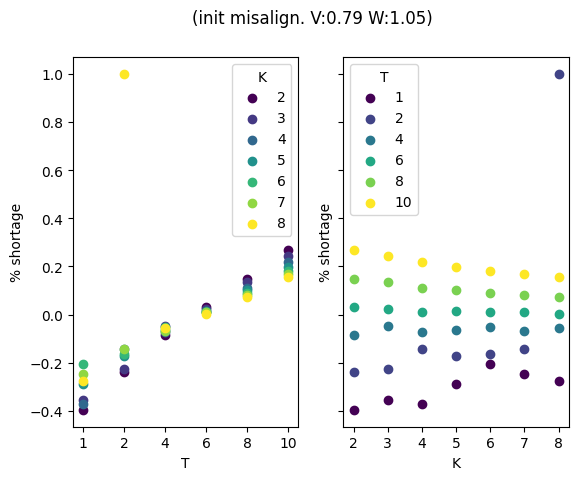

In [484]:
fig = plt.figure(figsize=(14,12))
_,axs = plt.subplots(1,2,sharey=True)
plt.suptitle(f'(init misalign. V:{v_angle} W:{w_angle})')
ax1=axs[0]
ax2=axs[1]
handles=[]
cmap=cm.viridis(range(0, len(num_tasks_list))/np.mean(range(0, len(num_tasks_list)))/2)

for i in range(difference_percent_heatmap.shape[0]):
    for j in range(difference_percent_heatmap.shape[1]):
        task = ax1.scatter(j, difference_percent_heatmap[i,j], color = cmap[i], label = num_tasks_list[i]) ## i: task, j : seq_len
    handles.append(task)

ax1.set_xlabel('T')
ax1.set_ylabel('% shortage') 
ax1.set_xticks(np.arange(len(seq_length_list)), seq_length_list)
ax1.legend(handles = handles, title = 'K')

handles=[]

cmap=cm.viridis(range(0, len(seq_length_list))/np.mean(range(0, len(seq_length_list)))/2)
for i in range(difference_percent_heatmap.shape[1]):
    for j in range(difference_percent_heatmap.shape[0]):
        seq = ax2.scatter(j, difference_percent_heatmap[j,i], color = cmap[i], label = seq_length_list[i]) 
    handles.append(seq)

ax2.set_xlabel('K')
ax2.set_ylabel('% shortage') 
ax2.legend(handles = handles, title = 'T')
ax2.set_xticks(np.arange(len(num_tasks_list)), num_tasks_list)

In [495]:


difference_percent={k: np.mean(v[:,0])/np.mean(curriculum_training_time[k][:,0]) for k,v in baseline_training_time.items() if k in curriculum_training_time.keys()}


num_tasks_list=np.unique(np.array(list(difference_percent.keys()))[:,0])
seq_length_list = np.unique(np.array(list(difference_percent.keys()))[:,1])

difference_percent_heatmap = np.ones((len(num_tasks_list), len(seq_length_list)))


for i,task in enumerate(num_tasks_list):
    for j, seq in enumerate(seq_length_list):
        try:
            difference_percent_heatmap[i][j] = difference_percent[(task,seq)]
        except:
            pass
        

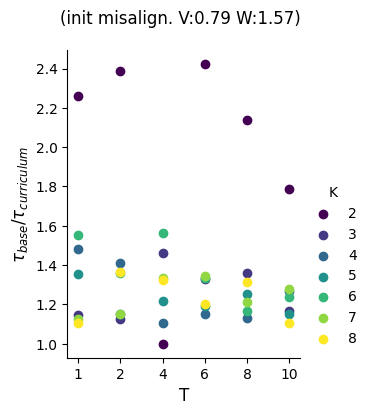

In [497]:
import matplotlib
fig = plt.figure(figsize=(3,4))
ax1 = plt.subplot(111)
plt.suptitle(f'(init misalign. V:{v_angle} W:{w_angle})')
handles=[]
cmap=matplotlib.cm.viridis(range(0, len(num_tasks_list))/np.mean(range(0, len(num_tasks_list)))/2)
for i in range(difference_percent_heatmap.shape[0]):
    for j in range(difference_percent_heatmap.shape[1]):
        task = ax1.scatter(j, difference_percent_heatmap[i,j], color = cmap[i], label = num_tasks_list[i]) ## i: task, j : seq_len
    handles.append(task)

ax1.set_xlabel('T', fontsize=12)
ax1.set_ylabel(r'$\tau_{base}/\tau_{curriculum}$', fontsize=12) 
ax1.set_xticks(np.arange(len(seq_length_list)), seq_length_list)
ax1.legend(handles = handles, title = 'K', frameon = False, bbox_to_anchor = (1.3, 0.6))

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

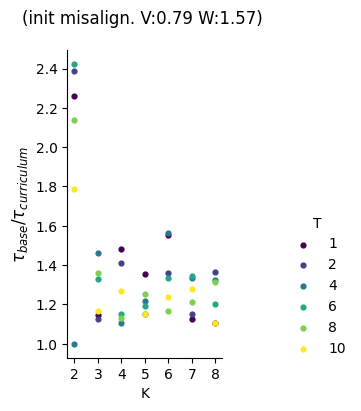

In [498]:
fig = plt.figure(figsize=(2,4))
ax2 = plt.subplot(111)
handles=[]
plt.suptitle(f'(init misalign. V:{v_angle} W:{w_angle})')

cmap=matplotlib.cm.viridis(range(0, len(seq_length_list))/np.mean(range(0, len(seq_length_list)))/2)
for i in range(difference_percent_heatmap.shape[1]):
    for j in range(difference_percent_heatmap.shape[0]):
        seq = ax2.scatter(j, difference_percent_heatmap[j,i], color = cmap[i], s=12, label = seq_length_list[i]) 
    handles.append(seq)

ax2.set_xlabel('K')
ax2.set_ylabel(r'$\tau_{base}/\tau_{curriculum}$', fontsize=12) 
ax2.legend(handles = handles, title = 'T', frameon = False, bbox_to_anchor = (1.35, 0.5))
ax2.set_xticks(np.arange(len(num_tasks_list)), num_tasks_list)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)